In [ ]:
%load_ext autoreload

%autoreload 2


from lucifex.sim import integrate, postprocess_structured
from co2_dissolution_pkg.simulation.solutal import solutal_convective_dissolution_2d

# physical parameters
RA = 1000
DA = 500
SR = 0.1
CR = 0.0
H0 = 0.9
EPSILON = 0.01

# mesh parameters
NX = 50
NY = 50

# numerical stabilization
C_STABILIZATION = None
C_LIMITS = (0, 1)

# time integration
T_STOP = 8.0
N_STOP = 20
DT_INIT = 1E-6
N_INIT = 10

simulation = solutal_convective_dissolution_2d(
            store_step=None, 
            write_step=1, 
            write_file=('FunctionSeries', 'ConstantSeries'),
            dir_base='./data_ipynb',
            dir_labels=('Ra', 'Da', 'sr', 'h0'),
    )(Ra=RA, Da=DA, Nx=NX, Ny=NY, c_stabilization=C_STABILIZATION, c_limits=C_LIMITS, secondary=True)

integrate(simulation, t_stop=T_STOP, n_stop=N_STOP, dt_init=DT_INIT, n_init=N_INIT, overwrite=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
from lucifex.viz import plot_colormap, plot_line, plot_cross_section

s = simulation['s']
psi = simulation['psi']
c = simulation['c']
dt = simulation['dt']
# uMinMax = simulation['uMinMax']

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='$x$', ylabel='$y$'>)

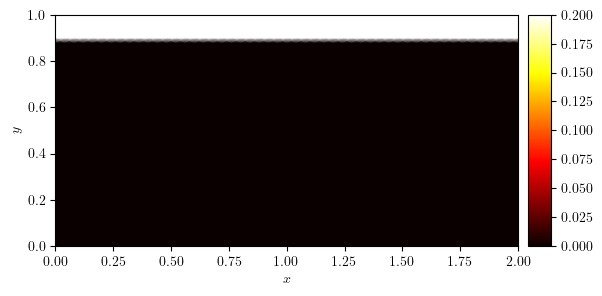

In [15]:
plot_colormap(s.series[0])


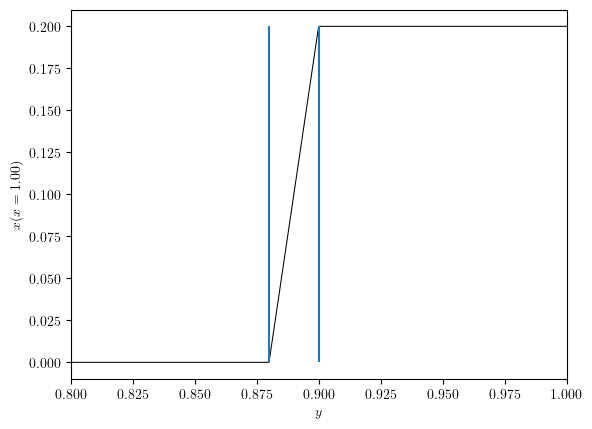

In [22]:
fig, ax = plot_cross_section(s.series[0], 'x', 0.5)

ax.set_xlim(0.8, 1.0)
ax.vlines(0.9, 0, 0.2)
ax.vlines(0.9 - 1/50, 0, 0.2)

In [ ]:
plot_line((uMinMax.time_series, [i[1] for i in uMinMax.value_series]))

In [ ]:
uMinMax.value_series